Результат квазиньютоновского метода (DFP):
Точка минимума: [ 0.00162237 -0.04439321]
Количество итераций: 13


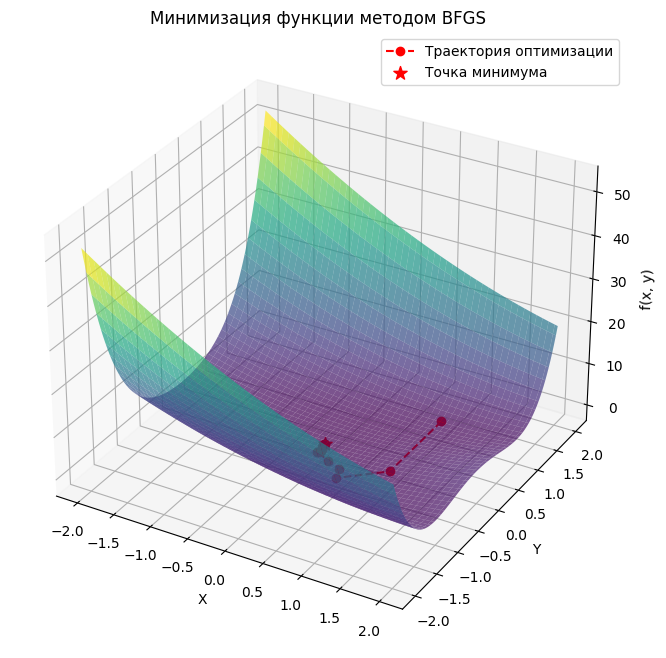

In [15]:
#Квазиньютоновский метод 1еВ

import numpy as np
import numpy.linalg as ln
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Целевая функция
# f(x,y) = (x - y^2)^2 + y^4
def f(x):
    return (x[0] - x[1]**2)**2 + x[1]**4

# Градиент функции (производные по x и y)
def f1(x):
    df_dx = 2 * (x[0] - x[1]**2)  # производная по x
    df_dy = -4 * x[1] * (x[0] - x[1]**2) + 4 * x[1]**3  # производная по y
    return np.array([df_dx, df_dy])

# Квазиньютоновский метод bfgs
def bfgs_method(f, fprime, x0, maxiter=None, epsi=1e-3):
    if maxiter is None:
        maxiter = len(x0) * 200

    # Инициализация переменных
    k = 0
    gfk = fprime(x0)  # градиент функции в начальной точке
    N = len(x0)  # размерность задачи
    I = np.eye(N, dtype=int)  # единичная матрица
    Hk = I  # начальная аппроксимация Гессиана
    xk = x0  # начальная точка
    trajectory = [xk]  # список для хранения точек траектории

    while ln.norm(gfk) > epsi and k < maxiter:
        pk = -np.dot(Hk, gfk)  # направление поиска (антиградиент с учетом Гессиана)
        line_search = sp.optimize.line_search(f, fprime, xk, pk)
        alpha_k = line_search[0] if line_search[0] is not None else 1e-3  # шаг вдоль направления pk
        xkp1 = xk + alpha_k * pk  # новая точка
        sk = xkp1 - xk  # разница координат
        xk = xkp1  # обновляем точку
        
        gfkp1 = fprime(xkp1)  # новый градиент
        yk = gfkp1 - gfk  # разница градиентов
        gfk = gfkp1  # обновляем градиент
        trajectory.append(xk)  # добавляем точку траектории

        # Обновление Гессиана
        k += 1
        ro = 1.0 / np.dot(yk, sk)
        A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
        A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]
        Hk = np.dot(A1, np.dot(Hk, A2)) + ro * sk[:, np.newaxis] * sk[np.newaxis, :]
        
    return xk, k, np.array(trajectory)

# Начальное приближение
initial_guess = np.array([1, 1])

# Запуск метода BFGS
result, k, trajectory = bfgs_method(f, f1, initial_guess)

print('Результат квазиньютоновского метода (DFP):')
print('Точка минимума: %s' % (result))
print('Количество итераций: %s' % (k))

# Построение графика функции и траектории оптимизации в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Параметры сетки для отображения функции
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = (X - Y**2)**2 + Y**4  # функция

# Построение поверхности
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Траектория оптимизации
trajectory = np.array(trajectory)
ax.plot(trajectory[:, 0], trajectory[:, 1], [f(point) for point in trajectory], 'r--', marker='o', label='Траектория оптимизации')

# Точка минимума
ax.scatter(result[0], result[1], f(result), color='red', s=100, label='Точка минимума', marker='*')

# Настройка графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Минимизация функции методом BFGS')
ax.legend()
plt.show()


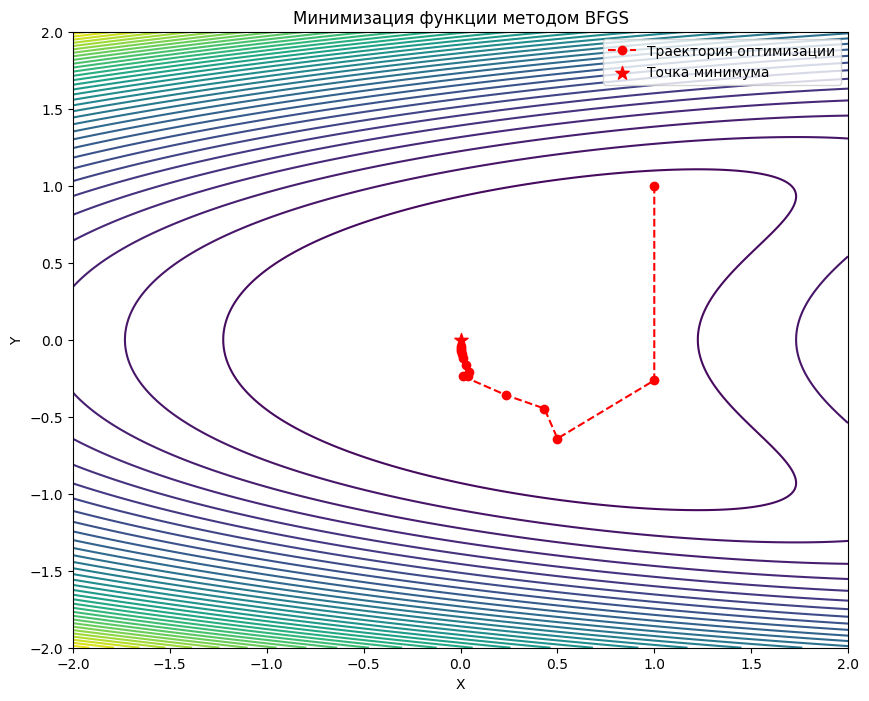

In [20]:
# Построение 2D графика уровней функции и траектории оптимизации
fig, ax = plt.subplots(figsize=(10, 8))

# Создание сетки для отображения уровней функции
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = (X - Y**2)**2 + Y**4

# Построение контуров уровней функции
contour = ax.contour(X, Y, Z, levels=50, cmap='viridis')
ax.plot(trajectory[:, 0], trajectory[:, 1], 'r--', marker='o', label='Траектория оптимизации')
ax.scatter(result[0], result[1], color='red', s=100, label='Точка минимума', marker='*')

# Настройка графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Минимизация функции методом BFGS')
ax.legend()
plt.show()


Результат квазиньютоновского метода (BFGS):
Точка минимума: [ 0.00000000e+00 -1.11022302e-16]
Количество итераций: 2


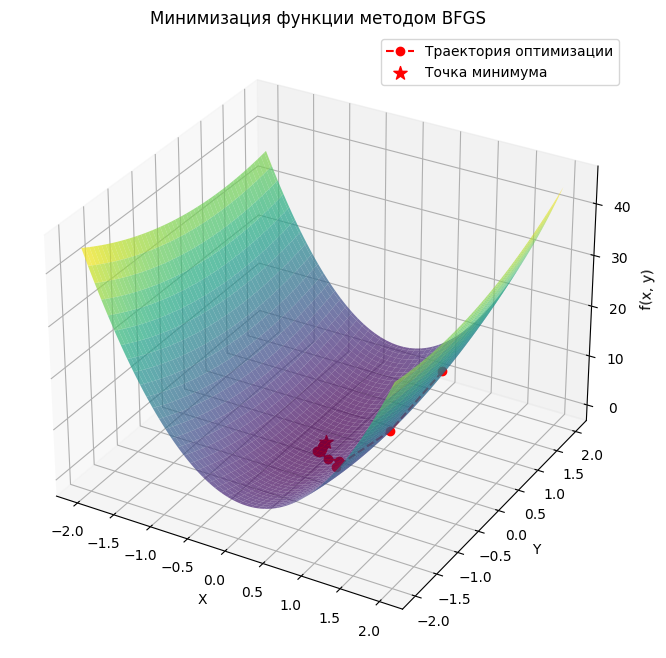

In [16]:
#Квазиньютоновский метод 1еС
import numpy as np
import numpy.linalg as ln
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Обновленная целевая функция
# f(x)= 9x^2+xy+y^2
def f(x):
    return 9 * x[0]**2 + x[0] * x[1] + x[1]**2

# Градиент целевой функции
def f1(x):
    return np.array([18 * x[0] + x[1], x[0] + 2 * x[1]])

# Квазиньютоновский метод BFGS
def bfgs_method(f, fprime, x0, maxiter=None, epsi=10e-3):
    #Минимизация функции методом BFGS
    if maxiter is None:
        maxiter = len(x0) * 200

    # начальные значения
    k = 0
    gfk = fprime(x0)
    N = len(x0)
    I = np.eye(N, dtype=int)  # Единичная матрица
    Hk = I  # Начальное приближение для обратной гессиана
    xk = x0
   
    while ln.norm(gfk) > epsi and k < maxiter:
        # pk - направление поиска
        pk = -np.dot(Hk, gfk)
        
        # Линейный поиск (находим alpha)
        line_search = sp.optimize.line_search(f, f1, xk, pk)
        alpha_k = line_search[0]
        
        # Обновление x
        xkp1 = xk + alpha_k * pk
        sk = xkp1 - xk  # Вектор изменения точки
        xk = xkp1
        
        # Обновление градиента
        gfkp1 = fprime(xkp1)
        yk = gfkp1 - gfk  # Изменение градиента
        gfk = gfkp1
        
        # Обновление итерации
        k += 1
        
        # Обновление обратной гессиана с помощью формулы BFGS
        ro = 1.0 / (np.dot(yk, sk))
        A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
        A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]
        Hk = np.dot(A1, np.dot(Hk, A2)) + (ro * sk[:, np.newaxis] * sk[np.newaxis, :])
        
    return (xk, k)

# Начальная точка
result, k = bfgs_method(f, f1, np.array([1, 1]))

# Результаты
print('Результат квазиньютоновского метода (BFGS):')
print('Точка минимума: %s' % (result))
print('Количество итераций: %s' % (k))

# Построение графика функции и траектории оптимизации в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Параметры сетки для отображения функции
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = 9*X**2 + X*Y + Y**2  # функция

# Построение поверхности
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Траектория оптимизации
trajectory = np.array(trajectory)
ax.plot(trajectory[:, 0], trajectory[:, 1], [f(point) for point in trajectory], 'r--', marker='o', label='Траектория оптимизации')

# Точка минимума
ax.scatter(result[0], result[1], f(result), color='red', s=100, label='Точка минимума', marker='*')

# Настройка графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Минимизация функции методом BFGS')
ax.legend()
plt.show()



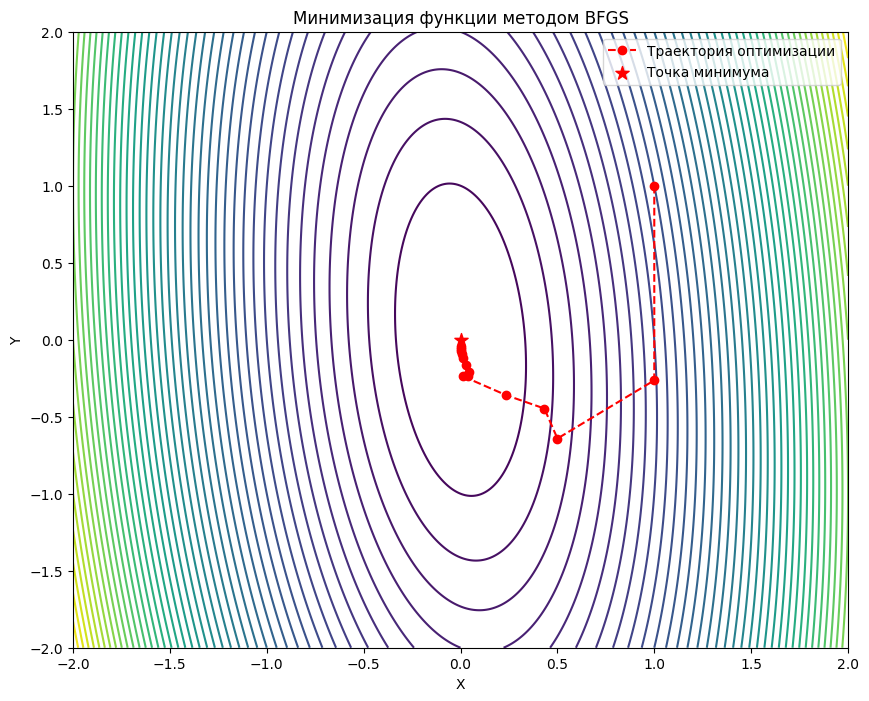

In [19]:
# Построение 2D графика уровней функции и траектории оптимизации
fig, ax = plt.subplots(figsize=(10, 8))

# Создание сетки для отображения уровней функции
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = 9*X**2 + X*Y + Y**2 

# Построение контуров уровней функции
contour = ax.contour(X, Y, Z, levels=50, cmap='viridis')
ax.plot(trajectory[:, 0], trajectory[:, 1], 'r--', marker='o', label='Траектория оптимизации')
ax.scatter(result[0], result[1], color='red', s=100, label='Точка минимума', marker='*')

# Настройка графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Минимизация функции методом BFGS')
ax.legend()
plt.show()
